In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sunrise-data/solete_vedic_timestamps_final.csv


In [3]:
from datetime import datetime, time
import plotly.express as px
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score

In [4]:
df=pd.read_csv('/kaggle/input/sunrise-data/solete_vedic_timestamps_final.csv')
df

,datetime,temperature,humidity,speed,direction,power,year,month,day,julian_day,season_flag,vedic_date,tithi,sunrise
0,2018-06-01 00:00:00,14.600000,0.7,1.311864,108.135593,0.038733,2018,6,1,2458270.5,2,2075-3-18,"18, 22, 14, 48",04:37:45
1,2018-06-01 00:01:00,14.600000,0.7,1.548333,115.033333,0.000033,2018,6,1,2458270.5,2,2075-3-18,"18, 22, 14, 48",04:37:45
2,2018-06-01 00:02:00,14.596667,0.7,1.365000,104.683333,0.029767,2018,6,1,2458270.5,2,2075-3-18,"18, 22, 14, 48",04:37:45
3,2018-06-01 00:03:00,14.510000,0.7,0.980000,111.400000,0.000000,2018,6,1,2458270.5,2,2075-3-18,"18, 22, 14, 48",04:37:45
4,2018-06-01 00:04:00,14.500000,0.7,1.263333,118.866667,0.166050,2018,6,1,2458270.5,2,2075-3-18,"18, 22, 14, 48",04:37:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658076,2019-08-31 23:56:00,20.500000,0.8,1.790000,105.566667,0.000000,2019,8,31,2458726.5,2,2076-6-1,"1, 8, 43, 48, 2, 28, 56, 40",06:15:22
658077,2019-08-31 23:57:00,20.500000,0.8,1.536667,110.016667,0.000000,2019,8,31,2458726.5,2,2076-6-1,"1, 8, 43, 48, 2, 28, 56, 40",06:15:22
658078,2019-08-31 23:58:00,20.491667,0.8,1.230000,120.933333,0.000000,2019,8,31,2458726.5,2,2076-6-1,"1, 8, 43, 48, 2, 28, 56, 40",06:15:22
658079,2019-08-31 23:59:00,20.400000,0.8,1.433333,102.216667,0.000000,2019,8,31,2458726.5,2,2076-6-1,"1, 8, 43, 48, 2, 28, 56, 40",06:15:22


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658081 entries, 0 to 658080
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   datetime     658081 non-null  object 
 1   temperature  658081 non-null  float64
 2   humidity     658081 non-null  float64
 3   speed        658081 non-null  float64
 4   direction    658081 non-null  float64
 5   power        658081 non-null  float64
 6   year         658081 non-null  int64  
 7   month        658081 non-null  int64  
 8   day          658081 non-null  int64  
 9   julian_day   658081 non-null  float64
 10  season_flag  658081 non-null  int64  
 11  vedic_date   658081 non-null  object 
 12  tithi        658081 non-null  object 
 13  sunrise      658081 non-null  object 
dtypes: float64(6), int64(4), object(4)
memory usage: 70.3+ MB


In [6]:
def fix_sunrise_time(t):
    try:
        h, m, s = map(int, t.split(':'))
        if s == 60:
            m += 1
            s = 0
        if m == 60:
            h += 1
            m = 0
        return time(h+5, m)  # increasing the sunrise time by 5 hours 
    except:
        return pd.NaT

df['sunrise'] = df['sunrise'].apply(fix_sunrise_time)

In [7]:
df['datetime'] = pd.to_datetime(df['datetime']) 

# Combine date from datetime with time from sunrise
df['sunrise'] = df.apply(lambda row: pd.Timestamp.combine(row['datetime'].date(), row['sunrise']), axis=1)

In [8]:
df

,datetime,temperature,humidity,speed,direction,power,year,month,day,julian_day,season_flag,vedic_date,tithi,sunrise
0,2018-06-01 00:00:00,14.600000,0.7,1.311864,108.135593,0.038733,2018,6,1,2458270.5,2,2075-3-18,"18, 22, 14, 48",2018-06-01 09:37:00
1,2018-06-01 00:01:00,14.600000,0.7,1.548333,115.033333,0.000033,2018,6,1,2458270.5,2,2075-3-18,"18, 22, 14, 48",2018-06-01 09:37:00
2,2018-06-01 00:02:00,14.596667,0.7,1.365000,104.683333,0.029767,2018,6,1,2458270.5,2,2075-3-18,"18, 22, 14, 48",2018-06-01 09:37:00
3,2018-06-01 00:03:00,14.510000,0.7,0.980000,111.400000,0.000000,2018,6,1,2458270.5,2,2075-3-18,"18, 22, 14, 48",2018-06-01 09:37:00
4,2018-06-01 00:04:00,14.500000,0.7,1.263333,118.866667,0.166050,2018,6,1,2458270.5,2,2075-3-18,"18, 22, 14, 48",2018-06-01 09:37:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658076,2019-08-31 23:56:00,20.500000,0.8,1.790000,105.566667,0.000000,2019,8,31,2458726.5,2,2076-6-1,"1, 8, 43, 48, 2, 28, 56, 40",2019-08-31 11:15:00
658077,2019-08-31 23:57:00,20.500000,0.8,1.536667,110.016667,0.000000,2019,8,31,2458726.5,2,2076-6-1,"1, 8, 43, 48, 2, 28, 56, 40",2019-08-31 11:15:00
658078,2019-08-31 23:58:00,20.491667,0.8,1.230000,120.933333,0.000000,2019,8,31,2458726.5,2,2076-6-1,"1, 8, 43, 48, 2, 28, 56, 40",2019-08-31 11:15:00
658079,2019-08-31 23:59:00,20.400000,0.8,1.433333,102.216667,0.000000,2019,8,31,2458726.5,2,2076-6-1,"1, 8, 43, 48, 2, 28, 56, 40",2019-08-31 11:15:00


In [9]:
df = df[df['datetime'] == df['sunrise']]
df

,datetime,temperature,humidity,speed,direction,power,year,month,day,julian_day,season_flag,vedic_date,tithi,sunrise
577,2018-06-01 09:37:00,24.228333,0.430000,1.176667,97.516667,0.000000,2018,6,1,2458270.5,2,2075-3-18,"18, 22, 14, 48",2018-06-01 09:37:00
2016,2018-06-02 09:36:00,24.340000,0.528333,1.840000,311.883333,0.000000,2018,6,2,2458271.5,2,2075-3-19,"19, 24, 47, 45",2018-06-02 09:36:00
3455,2018-06-03 09:35:00,23.615000,0.700000,2.536667,255.866667,1.169833,2018,6,3,2458272.5,2,2075-3-20,"20, 27, 22, 40",2018-06-03 09:35:00
4894,2018-06-04 09:34:00,21.200000,0.700000,4.305000,271.616667,6.405717,2018,6,4,2458273.5,2,2075-3-21,"21, 29, 46, 29",2018-06-04 09:34:00
6334,2018-06-05 09:34:00,22.173333,0.300000,1.681667,222.383333,0.000000,2018,6,5,2458274.5,2,2075-3-21,"21, 5, 46, 29",2018-06-05 09:34:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651547,2019-08-27 11:07:00,23.010000,0.800000,2.098333,295.966667,0.000000,2019,8,27,2458722.5,2,2076-5-27,"27, 23, 6, 18",2019-08-27 11:07:00
652989,2019-08-28 11:09:00,26.200000,0.700000,3.985000,112.416667,2.866783,2019,8,28,2458723.5,2,2076-5-28,"28, 19, 58, 40",2019-08-28 11:09:00
654431,2019-08-29 11:11:00,22.620000,0.800000,1.670000,292.400000,0.000000,2019,8,29,2458724.5,2,2076-5-29,"29, 16, 25, 39",2019-08-29 11:11:00
655873,2019-08-30 11:13:00,21.841667,0.600000,3.118333,254.883333,2.488850,2019,8,30,2458725.5,2,2076-5-30,"30, 12, 37, 8",2019-08-30 11:13:00


In [10]:
df = df.loc[(df['datetime'] >= '2018-08-01 00:00:00') & (df['datetime'] < '2019-05-30 00:00:00')].copy()
df=df[['datetime','power','speed','temperature','humidity','direction']]
df.reset_index(drop=True, inplace=True)
df=df.copy()
df

,datetime,power,speed,temperature,humidity,direction
0,2018-08-01 10:18:00,0.204117,2.140000,22.300000,0.800000,242.550000
1,2018-08-02 10:20:00,0.000000,2.025000,25.845000,0.500000,302.616667
2,2018-08-03 10:22:00,0.935600,3.460000,27.653333,0.400000,286.400000
3,2018-08-04 10:24:00,6.400550,5.125000,22.655000,0.700000,285.816667
4,2018-08-05 10:25:00,9.644317,10.696667,20.698333,0.600000,285.266667
...,...,...,...,...,...,...
297,2019-05-25 09:46:00,5.077550,4.160000,13.741667,0.700000,271.200000
298,2019-05-26 09:45:00,7.970117,4.081667,12.001667,0.900000,230.266667
299,2019-05-27 09:43:00,9.420067,5.413333,14.550000,0.700000,274.533333
300,2019-05-28 09:42:00,1.479900,3.765000,10.700000,0.600000,288.500000


In [11]:
fig = px.line(df, x=df.index, y='power', title='Power vs Datetime')
fig.show()

In [12]:
# Replace values in 'power' column
median_power = df['power'].mean()
df['power'] = np.where((df['power'] > 11.5), 0, df['power'])
zero_power_indices = df[df['power'] == 0].index
for i in zero_power_indices:
    neighbor_mean = df['power'].iloc[max(0, i - 5): min(len(df), i + 6)].mean()
    df.at[i, 'power'] = neighbor_mean


# Replace values in 'speed' column
median_speed = df['speed'].mean()
df['speed'] = np.where((df['speed'] > 14) | (df['speed'] < 0.25), 0, df['speed'])
zero_power_indices = df[df['speed'] == 0].index
for i in zero_power_indices:
    neighbor_mean = df['speed'].iloc[max(0, i - 5): min(len(df), i + 6)].mean()
    df.at[i, 'speed'] = neighbor_mean
    

# Replace values in 'temperature' column
median_temperature = df['temperature'].mean()
df['temperature'] = np.where((df['temperature'] > 30), 0, df['temperature'])
zero_power_indices = df[df['temperature'] == 0].index
for i in zero_power_indices:
    neighbor_mean = df['temperature'].iloc[max(0, i - 5): min(len(df), i + 6)].mean()
    df.at[i, 'temperature'] = neighbor_mean


# Replace values in 'humidity' column
median_humidity = df['humidity'].mean()
df['humidity'] = np.where((df['humidity'] > 1.06) | (df['humidity'] < 0.3), 0, df['humidity'])
zero_power_indices = df[df['humidity'] == 0].index
for i in zero_power_indices:
    neighbor_mean = df['humidity'].iloc[max(0, i - 5): min(len(df), i + 6)].mean()
    df.at[i, 'humidity'] = neighbor_mean


# Replace values in 'direction' column
median_direction = df['direction'].mean()
df['direction'] = np.where((df['direction'] > 320) | (df['direction'] < 50), 0, df['direction'])
zero_power_indices = df[df['direction'] == 0].index
for i in zero_power_indices:
    neighbor_mean = df['direction'].iloc[max(0, i - 5): min(len(df), i + 6)].mean()
    df.at[i, 'direction'] = neighbor_mean

In [13]:
df.isna().sum()

datetime       0
power          0
speed          0
temperature    0
humidity       0
direction      0
dtype: int64

In [14]:
df.set_index('datetime', inplace=True) 
df

,power,speed,temperature,humidity,direction
datetime,,,,,
2018-08-01 10:18:00,0.204117,2.140000,22.300000,0.800000,242.550000
2018-08-02 10:20:00,2.461195,2.025000,25.845000,0.500000,302.616667
2018-08-03 10:22:00,0.935600,3.460000,27.653333,0.400000,286.400000
2018-08-04 10:24:00,6.400550,5.125000,22.655000,0.700000,285.816667
2018-08-05 10:25:00,9.644317,10.696667,20.698333,0.600000,285.266667
...,...,...,...,...,...
2019-05-25 09:46:00,5.077550,4.160000,13.741667,0.700000,271.200000
2019-05-26 09:45:00,7.970117,4.081667,12.001667,0.900000,230.266667
2019-05-27 09:43:00,9.420067,5.413333,14.550000,0.700000,274.533333


In [15]:
!pip install vmdpy

In [16]:
import vmdpy
from scipy.stats import pearsonr

In [17]:
def ivmd(signal, kmax,alpha, tau, DC, init, tol):
    """
    Performs VMD decomposition on the given signal for different K values and calculates the average correlation coefficient for each K value.

    Args:
        signal: The signal to be decomposed.
        kmax: The maximum K value.

    Returns:
        The K value with the least average correlation coefficient.
    """

    # Perform VMD decomposition for different K values
    imfs = []
    for k in range(3, kmax + 1):
        imfs_k,z,v = vmdpy.VMD(signal, alpha, tau, k, DC, init, tol)
        imfs.append(imfs_k)

    # Calculate the correlation coefficients between adjacent IMFs for each K value
    correlation_coefficients = []
    for k in range(3, kmax + 1):
        correlation_coefficient_df = []
        for j in range(len(imfs[k - 3])-1):
            correlation_coefficient, _ = pearsonr(imfs[k-3][:, j], imfs[k-3][:, j+1])
            correlation_coefficient_df.append(correlation_coefficient)
        correlation_coefficients.append(correlation_coefficient_df)

    # Calculate the average correlation coefficient for each K value
    # average_correlation_coefficients = []
    # for k in range(3, kmax):
    #     average_correlation_coefficient = correlation_coefficients[k - 3].sum()/correlation_coefficient[k-3].count()
    #     average_correlation_coefficients.append(average_correlation_coefficient)

    average_correlation_coefficients = []
    for correlation_coefficient_df in correlation_coefficients:
        average_correlation_coefficient = sum(correlation_coefficient_df) / len(correlation_coefficient_df)
        average_correlation_coefficients.append(average_correlation_coefficient)
    # Find the K value with the least average correlation coefficient
    # optimal_k = np.argmin(average_correlation_coefficients) + 3
    print(average_correlation_coefficients)
    optimal_k = average_correlation_coefficients.index(min(average_correlation_coefficients))+3

    return optimal_k

In [18]:
alpha = 500       # Adjust based on signal characteristics
tau = 0        # Strict fidelity enforcement
k = 10             # Adjust based on the complexity of the signal
DC = 0          # Include DC part
init = 1           # Initialize omegas uniformly
tol = 1e-7         # Small tolerance for convergence


#. Run VMD
f = df["power"]
# Perform IVMD decomposition
lastk = ivmd(f, k,alpha, tau,  DC, init, tol)
print(lastk)


[0.7978658422872285, 0.8908886628128286, 0.8609649336705307, 0.8467676858229503, 0.8392344485810334, 0.7845747168856861, 0.7849012301675184, 0.7089091198374265]
10


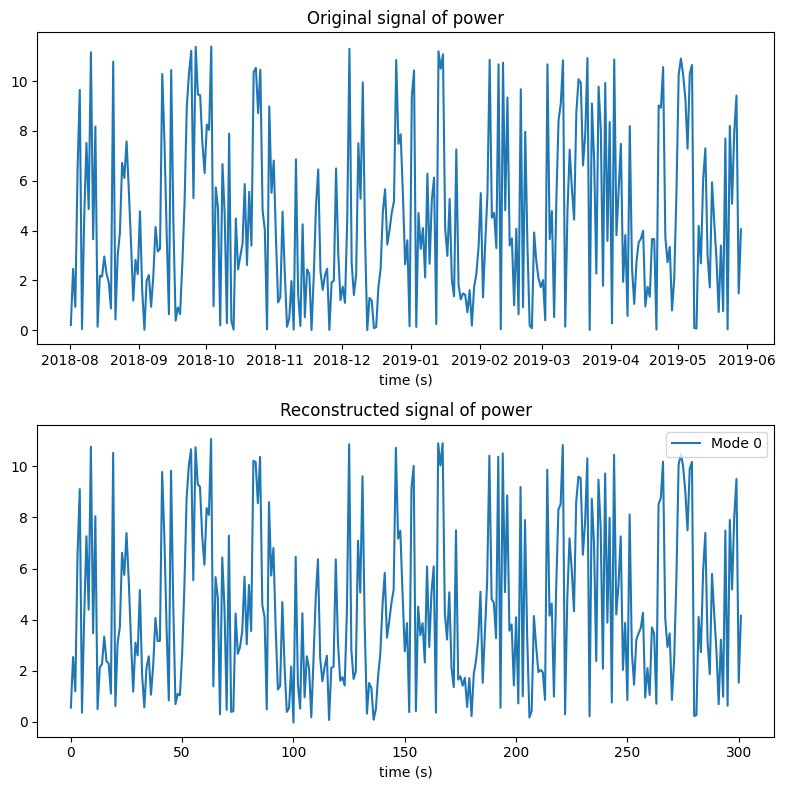

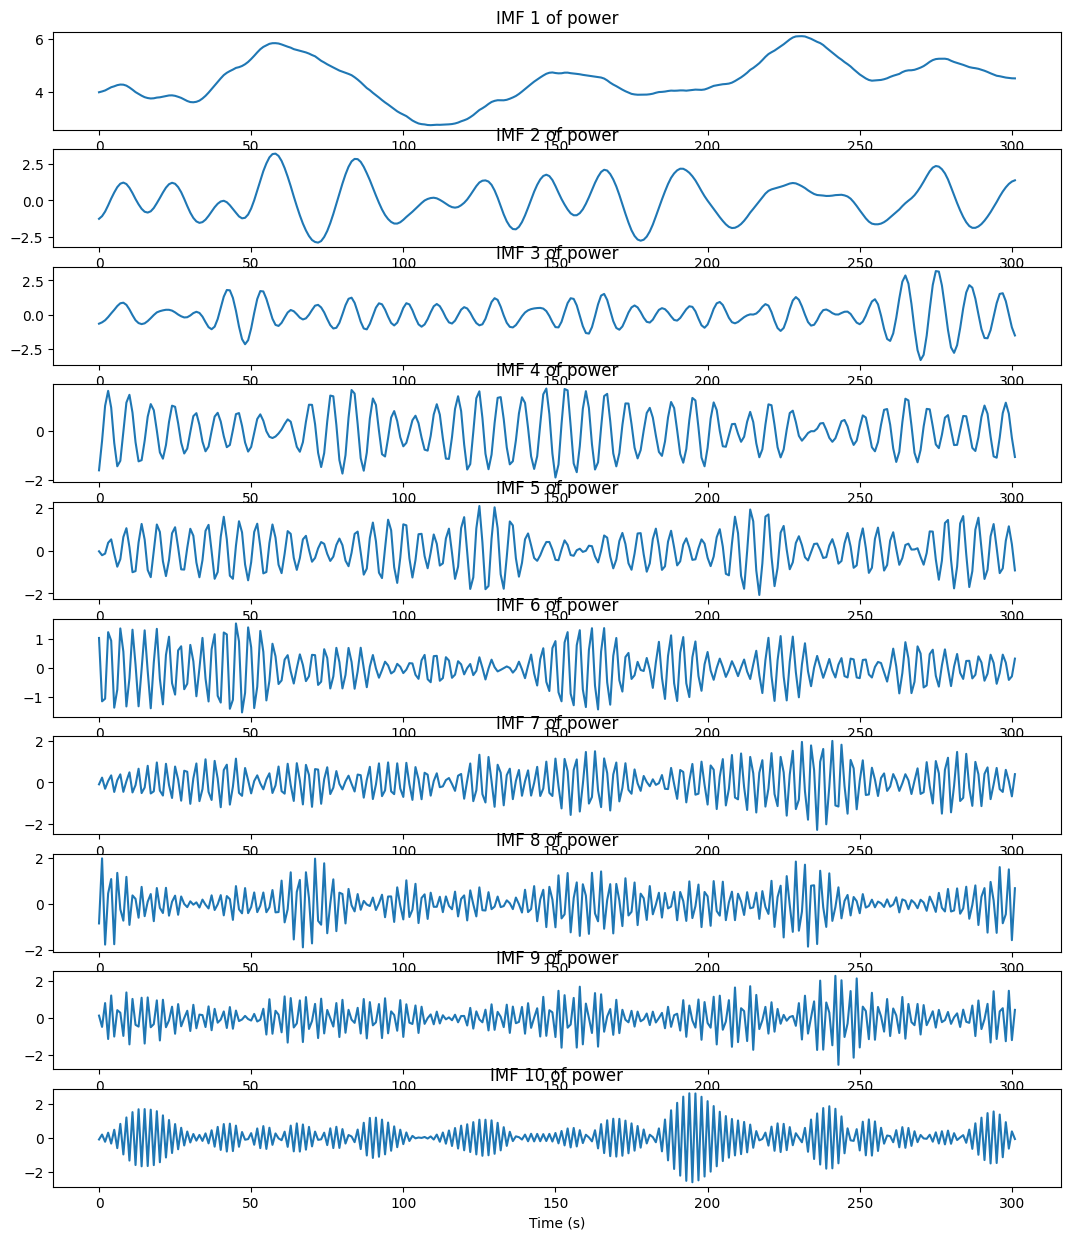

In [19]:
u,z,v = vmdpy.VMD(f, alpha, tau, 10, DC, init, tol)


imfsdata = pd.DataFrame(u)
datap = imfsdata.T
datap.index = df.index
datap["power"] = df["power"]


recon_sig = sum(u)
#. Visualize decomposed modes
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(f[:5000])
plt.title('Original signal of power')
plt.xlabel('time (s)')
plt.subplot(2,1,2)
plt.plot(recon_sig[:5000])
plt.title('Reconstructed signal of power')
plt.xlabel('time (s)')
plt.legend(['Mode %d'%m_i for m_i in range(u.shape[0])])
plt.tight_layout()


plt.figure(figsize=(13,15))
imfs=u
num_imfs = len(imfs)
for i in range(num_imfs):
    plt.subplot(num_imfs, 1, i + 1)
    plt.plot(u[i][:5000])
    plt.title('IMF {} of power'.format(i + 1))
    plt.xlabel('Time (s)')
plt.show()

In [20]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
if len(f) > len(recon_sig):
    f = f[:len(recon_sig)]
else:
    recon_sig = recon_sig[:len(f)]
print('# RMSE GP : ' + str(rmse(recon_sig, f)))

# RMSE GP : 0.2696993616526381


In [21]:
datap

,0,1,2,3,4,5,6,7,8,9,power
datetime,,,,,,,,,,,
2018-08-01 10:18:00,3.989290,-1.257184,-0.663752,-1.593170,-0.035859,1.047436,-0.090100,-0.862015,0.139941,-0.109517,0.204117
2018-08-02 10:20:00,4.019976,-1.076027,-0.565941,-0.397597,-0.219006,-1.138365,0.230019,1.975406,-0.470998,0.181379,2.461195
2018-08-03 10:22:00,4.057495,-0.763941,-0.413830,1.027136,-0.143378,-1.047262,-0.301487,-1.785951,0.818569,-0.244851,0.935600
2018-08-04 10:24:00,4.117129,-0.339426,-0.180148,1.635515,0.360958,1.248401,0.069527,0.448408,-1.125206,0.290642,6.400550
2018-08-05 10:25:00,4.178204,0.122860,0.092339,0.955199,0.520531,0.952699,0.336782,1.072613,1.229738,-0.351961,9.644317
...,...,...,...,...,...,...,...,...,...,...,...
2019-05-25 09:46:00,4.567554,0.603140,1.565147,0.734624,-0.832902,0.472165,-0.453141,-0.855167,0.541203,-1.157410,5.077550
2019-05-26 09:45:00,4.542406,0.889643,0.986574,1.154531,0.456607,0.197229,0.601746,-0.461063,-1.246127,0.912882,7.970117
2019-05-27 09:43:00,4.527058,1.123453,0.031931,0.709165,1.130099,-0.399046,0.057706,1.495229,1.485387,-0.648889,9.420067


In [22]:
alpha = 2000       # moderate bandwidth constraint
tau = 1            # noise-tolerance (no strict fidelity enforcement)
K = 10              # 3 modes
DC = 0             # no DC part imposed
init = 1           # initialize omegas uniformly
tol = 1e-7

#. Run VMD
f = df["speed"]
# Perform IVMD decomposition
lastk = ivmd(f, k,alpha, tau,  DC, init, tol)

print(lastk)

[0.9194859279114393, 0.4948494508184433, 0.8172196179784114, 0.7134665645011363, 0.707172781100513, 0.8244403064177488, 0.7651427646642361, 0.7667173764959058]
4


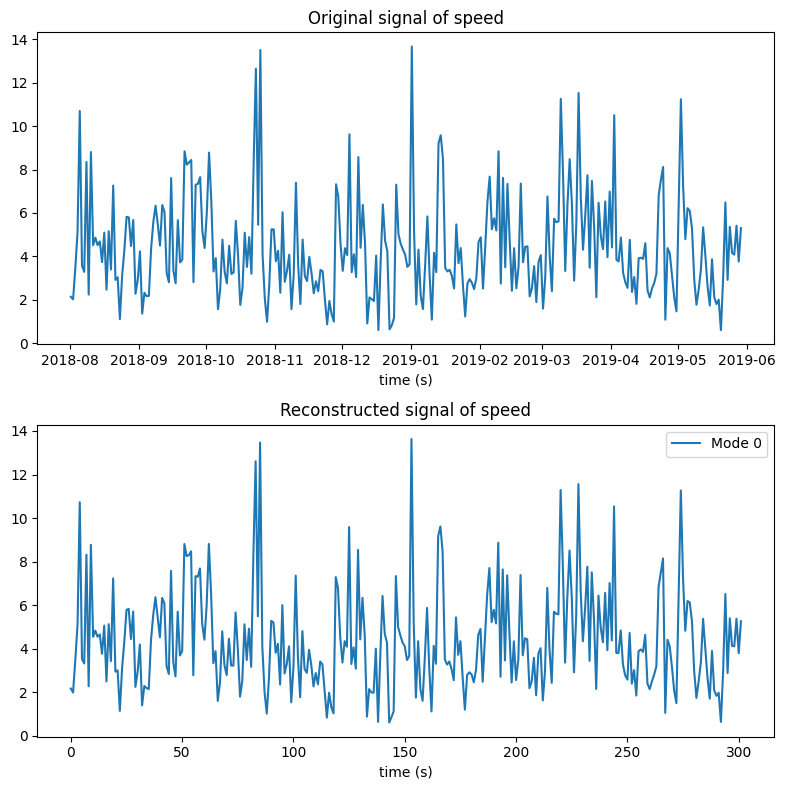

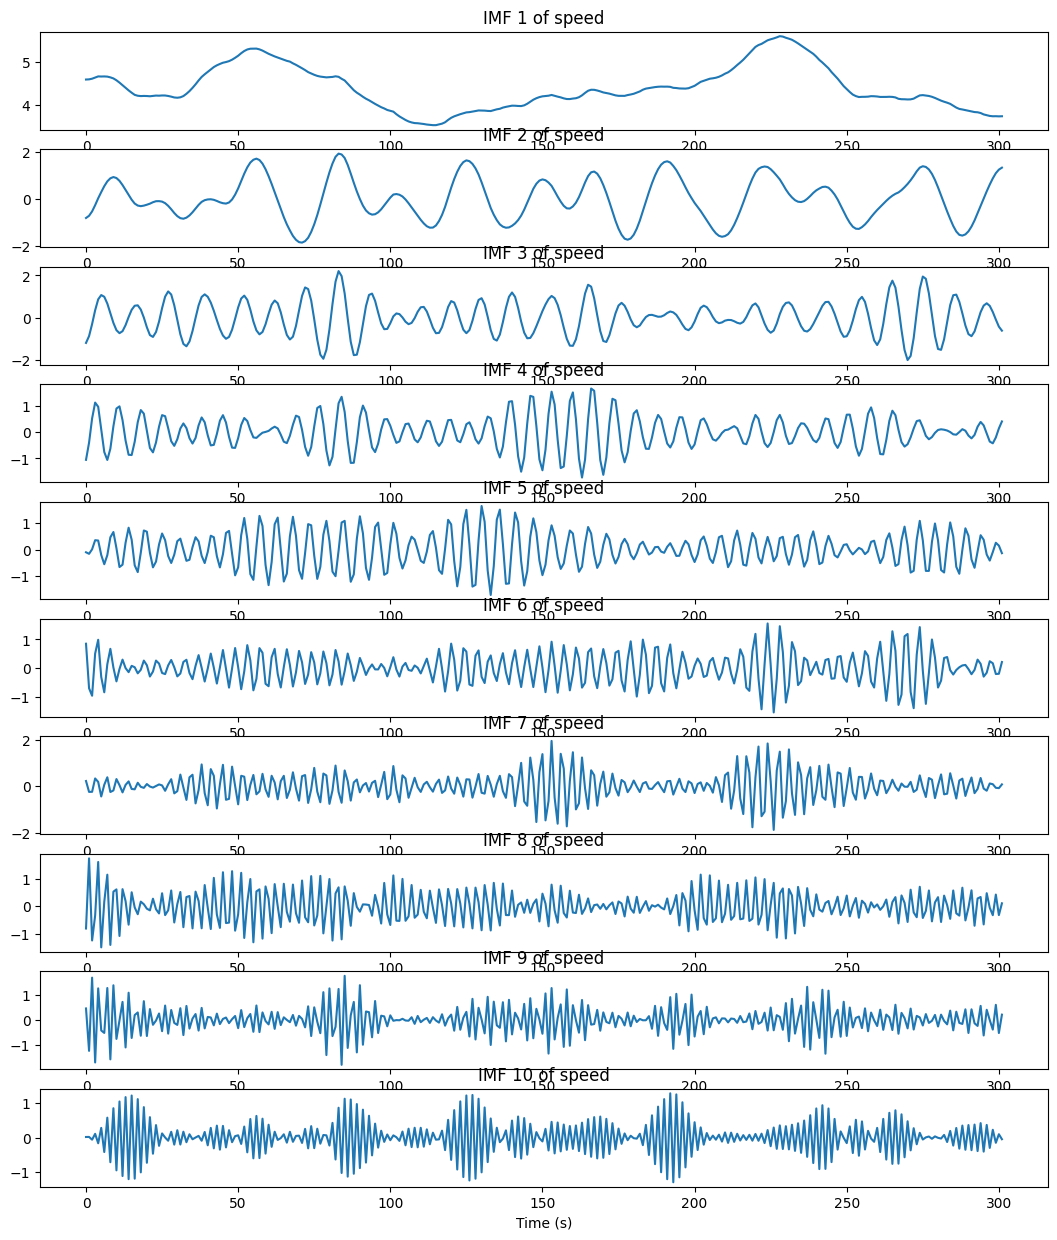

In [23]:
u,z,v = vmdpy.VMD(f, alpha, tau, 10, DC, init, tol)

imfsdata = pd.DataFrame(u)
datas = imfsdata.T
datas.index = df.index
datas["power"] = df["power"]

recon_sig = sum(u)
#. Visualize decomposed modes
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(f[:5000])
plt.title('Original signal of speed')
plt.xlabel('time (s)')
plt.subplot(2,1,2)
plt.plot(recon_sig[:5000])
plt.title('Reconstructed signal of speed')
plt.xlabel('time (s)')
plt.legend(['Mode %d'%m_i for m_i in range(u.shape[0])])
plt.tight_layout()

plt.figure(figsize=(13,15))
imfs=u
num_imfs = len(imfs)
for i in range(num_imfs):
    plt.subplot(num_imfs, 1, i + 1)
    plt.plot(u[i][:5000])
    plt.title('IMF {} of speed'.format(i + 1))
    plt.xlabel('Time (s)')
plt.show()

In [24]:
datas

,0,1,2,3,4,5,6,7,8,9,power
datetime,,,,,,,,,,,
2018-08-01 10:18:00,4.587740,-0.809006,-1.194275,-1.054370,-0.103617,0.851693,0.222004,-0.799589,0.457473,0.014873,0.204117
2018-08-02 10:20:00,4.591622,-0.715789,-0.871302,-0.402198,-0.160970,-0.707694,-0.246101,1.734753,-1.247212,0.016976,2.461195
2018-08-03 10:22:00,4.607045,-0.528437,-0.301838,0.517987,0.008331,-0.970096,-0.242140,-1.231839,1.696595,-0.062721,0.935600
2018-08-04 10:24:00,4.635295,-0.264171,0.351148,1.120035,0.347072,0.508511,0.331457,-0.329933,-1.713577,0.106262,6.400550
2018-08-05 10:25:00,4.660843,0.029644,0.866999,0.961481,0.334601,0.989844,0.182727,1.604315,1.265566,-0.166433,9.644317
...,...,...,...,...,...,...,...,...,...,...,...
2019-05-25 09:46:00,3.734768,0.612658,0.558447,-0.360763,-0.413337,0.237668,0.116130,-0.049436,-0.008653,-0.300409,5.077550
2019-05-26 09:45:00,3.727162,0.875378,0.268950,-0.427083,-0.094888,0.167837,0.084432,-0.317925,-0.392315,0.223045,7.970117
2019-05-27 09:43:00,3.728492,1.097367,-0.089571,-0.204513,0.251206,-0.208612,-0.070421,0.426166,0.602949,-0.152610,9.420067


In [25]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())


if len(f) > len(recon_sig):
    f = f[:len(recon_sig)]
else:
    recon_sig = recon_sig[:len(f)]

print('# RMSE GP : ' + str(rmse(recon_sig, f)))

# RMSE GP : 0.032908569848638686


In [26]:
alpha = 2000       # moderate bandwidth constraint
tau = 1           # noise-tolerance (no strict fidelity enforcement)
K = 3              # 3 modes
DC = 0             # no DC part imposed
init = 1           # initialize omegas uniformly
tol = 1e-7

#. Run VMD
f = df["temperature"]
# Perform IVMD decomposition
lastk = ivmd(f, k,alpha, tau,  DC, init, tol)
print(lastk)

[0.9534494508249056, 0.994591646092937, 0.9685026925234724, 0.9871818876685318, 0.9896543486870831, 0.989484317565755, 0.9869058315821513, 0.9886750467611436]
3


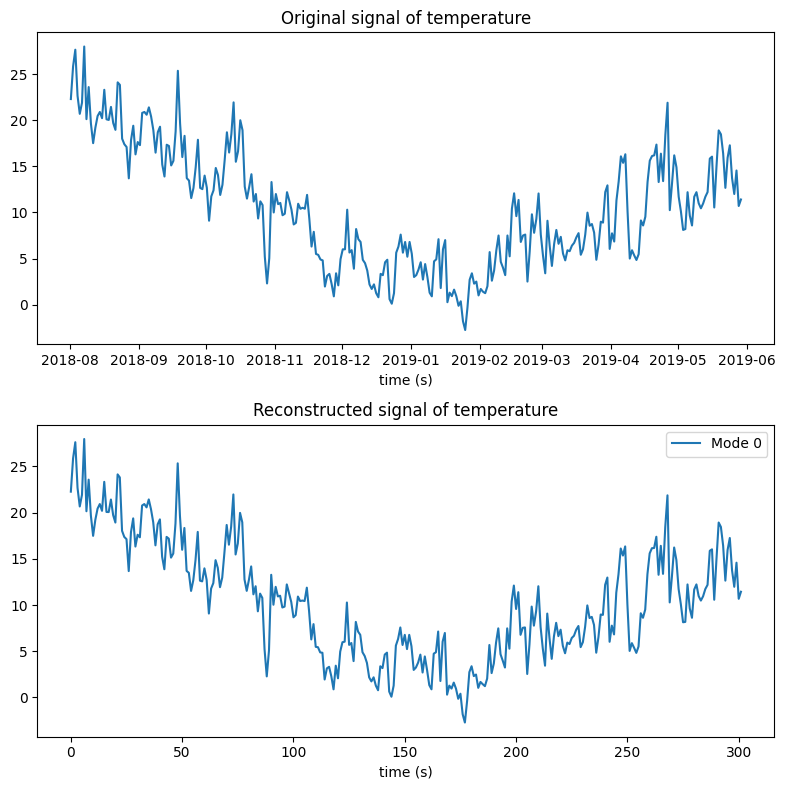

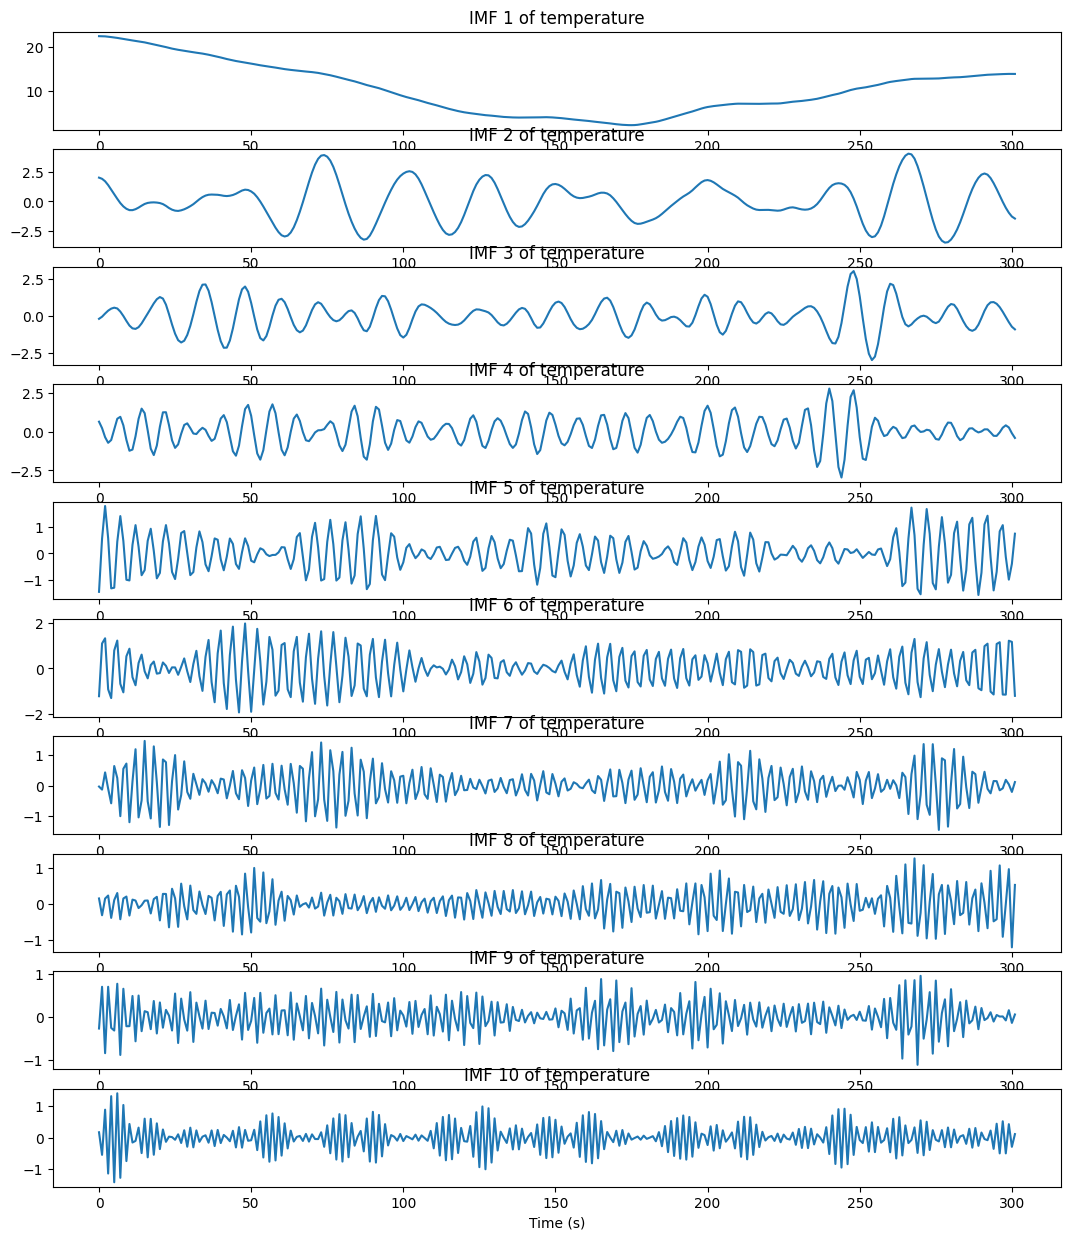

In [27]:
u,z,v = vmdpy.VMD(f, alpha, tau, 10, DC, init, tol)


imfsdata = pd.DataFrame(u)
datat = imfsdata.T
datat.index = df.index
datat["power"] = df["power"]

recon_sig = sum(u)
#. Visualize decomposed modes
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(f[:5000])
plt.title('Original signal of temperature')
plt.xlabel('time (s)')
plt.subplot(2,1,2)
plt.plot(recon_sig[:5000])
plt.title('Reconstructed signal of temperature')
plt.xlabel('time (s)')
plt.legend(['Mode %d'%m_i for m_i in range(u.shape[0])])
plt.tight_layout()

plt.figure(figsize=(13,15))
imfs=u
num_imfs = len(imfs)
for i in range(num_imfs):
    plt.subplot(num_imfs, 1, i + 1)
    plt.plot(u[i][:5000])
    plt.title('IMF {} of temperature'.format(i + 1))
    plt.xlabel('Time (s)')
plt.show()

In [28]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
if len(f) > len(recon_sig):
    f = f[:len(recon_sig)]
else:
    recon_sig = recon_sig[:len(f)]
print('# RMSE GP : ' + str(rmse(recon_sig, f)))

# RMSE GP : 0.02935151090128145


In [29]:
datat

,0,1,2,3,4,5,6,7,8,9,power
datetime,,,,,,,,,,,
2018-08-01 10:18:00,22.388455,2.044301,-0.174187,0.644748,-1.439019,-1.215975,-0.033695,0.154870,-0.271098,0.172286,0.204117
2018-08-02 10:20:00,22.378119,1.944227,-0.031740,0.229614,0.552463,1.092558,-0.132045,-0.311445,0.699903,-0.547355,2.461195
2018-08-03 10:22:00,22.343983,1.732113,0.181176,-0.353536,1.774761,1.320274,0.425769,0.151878,-0.844820,0.892387,0.935600
2018-08-04 10:24:00,22.273516,1.407144,0.374320,-0.717634,0.570521,-0.913704,-0.103204,0.235976,0.699927,-1.142475,6.400550
2018-08-05 10:25:00,22.182151,1.015222,0.510965,-0.537227,-1.309609,-1.298657,-0.576253,-0.384019,-0.256745,1.323095,9.644317
...,...,...,...,...,...,...,...,...,...,...,...
2019-05-25 09:46:00,13.802334,-0.036301,0.298669,0.258299,1.058724,-1.143558,-0.090776,-0.908871,0.010035,0.522488,5.077550
2019-05-26 09:45:00,13.826950,-0.540701,-0.052031,0.410386,-0.129886,-1.146081,0.184664,0.001905,-0.082289,-0.500666,7.970117
2019-05-27 09:43:00,13.844514,-0.965015,-0.398615,0.273836,-0.981342,1.213912,0.037293,0.968714,0.155144,0.430944,9.420067


In [30]:
alpha = 550       # Adjust based on signal characteristics
tau = 0        # Strict fidelity enforcement
k = 10             # Adjust based on the complexity of the signal
DC = 0          # Include DC part
init = 1           # Initialize omegas uniformly
tol = 1e-7         # Small tolerance for convergence

#. Run VMD
f = df["humidity"]
# Perform IVMD decomposition
lastk = ivmd(f, k,alpha, tau,  DC, init, tol)
print(lastk)

[0.9843964453723377, 0.9781922277646369, 0.9572586479827776, 0.965212251053684, 0.974710645153174, 0.9776521501508049, 0.9795865737103987, 0.9776360087524052]
5


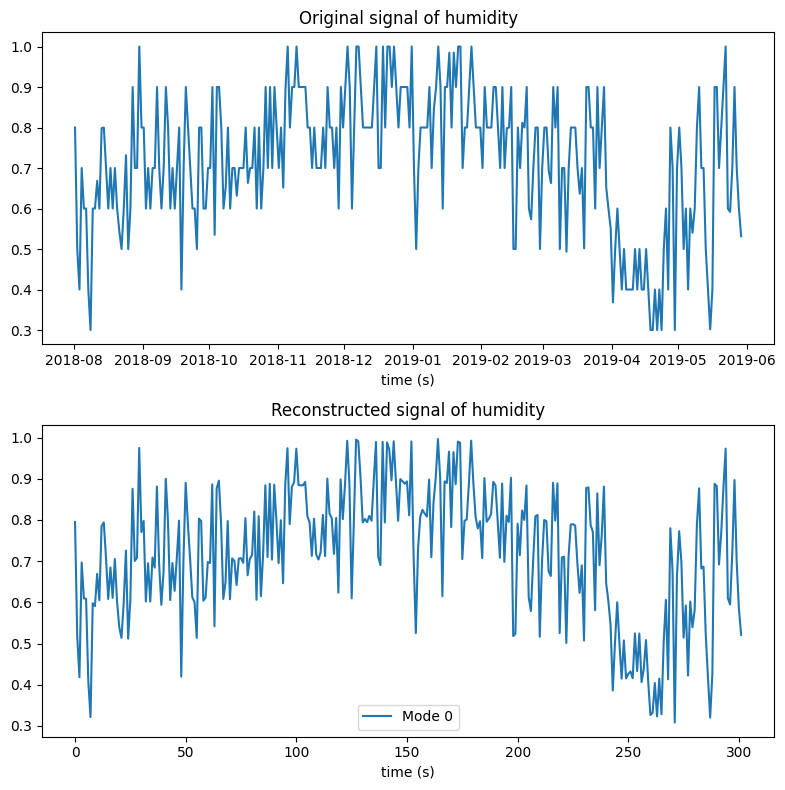

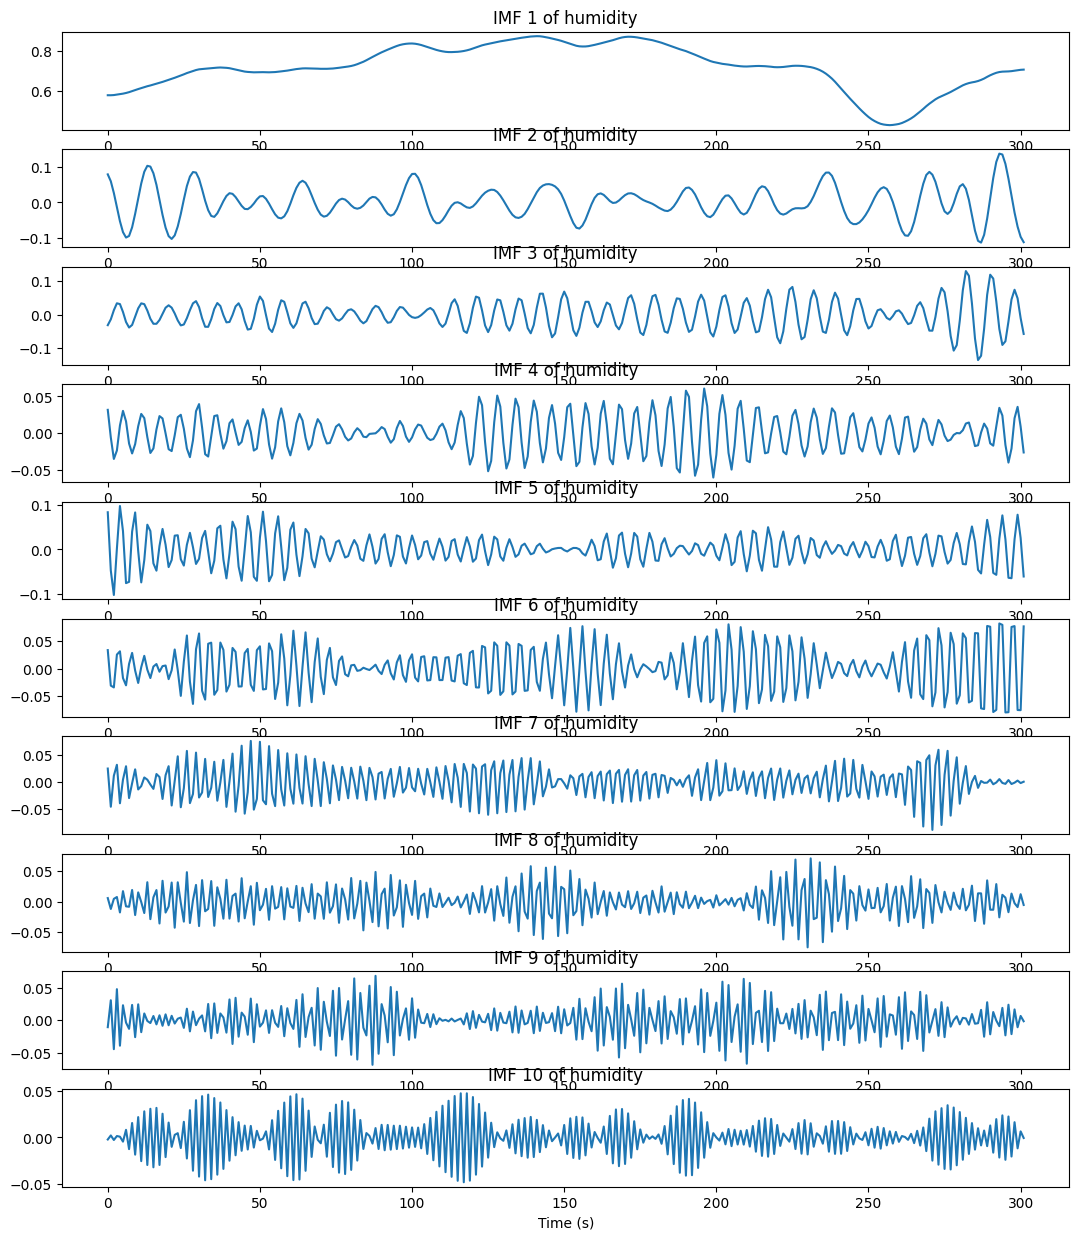

In [31]:
u,z,v = vmdpy.VMD(f, alpha, tau, 10, DC, init, tol)

imfsdata = pd.DataFrame(u)
datah = imfsdata.T
datah.index = df.index
datah["power"] = df["power"]

recon_sig = sum(u)
#. Visualize decomposed modes
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(f[:5000])
plt.title('Original signal of humidity')
plt.xlabel('time (s)')
plt.subplot(2,1,2)
plt.plot(recon_sig[:5000])
plt.title('Reconstructed signal of humidity')
plt.xlabel('time (s)')
plt.legend(['Mode %d'%m_i for m_i in range(u.shape[0])])
plt.tight_layout()

plt.figure(figsize=(13,15))
imfs=u
num_imfs = len(imfs)
for i in range(num_imfs):
    plt.subplot(num_imfs, 1, i + 1)
    plt.plot(u[i][:5000])
    plt.title('IMF {} of humidity'.format(i + 1))
    plt.xlabel('Time (s)')
plt.show()

In [32]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
if len(f) > len(recon_sig):
    f = f[:len(recon_sig)]
else:
    recon_sig = recon_sig[:len(f)]
print('# RMSE GP : ' + str(rmse(recon_sig, f)))

# RMSE GP : 0.013789000413879472


In [33]:
datah

,0,1,2,3,4,5,6,7,8,9,power
datetime,,,,,,,,,,,
2018-08-01 10:18:00,0.580814,0.078276,-0.031305,0.031772,0.083969,0.033222,0.025213,0.006012,-0.010829,-0.002147,0.204117
2018-08-02 10:20:00,0.580761,0.059052,-0.014092,-0.005897,-0.047861,-0.030733,-0.045318,-0.011773,0.030492,0.002183,2.461195
2018-08-03 10:22:00,0.581675,0.026262,0.012961,-0.035149,-0.103117,-0.034018,0.011936,0.004769,-0.044600,-0.002670,0.935600
2018-08-04 10:24:00,0.583823,-0.012951,0.033578,-0.023637,0.001782,0.025128,0.032170,0.007753,0.047503,0.001560,6.400550
2018-08-05 10:25:00,0.585907,-0.052422,0.031214,0.010434,0.098132,0.031060,-0.038910,-0.017406,-0.039264,0.000870,9.644317
...,...,...,...,...,...,...,...,...,...,...,...
2019-05-25 09:46:00,0.699961,0.018083,0.044995,-0.020983,-0.065213,0.074908,-0.003332,0.013364,-0.021499,-0.020368,5.077550
2019-05-26 09:45:00,0.702240,-0.028280,0.073748,0.020401,0.022773,0.076482,-0.000867,-0.002341,0.016409,0.016367,7.970117
2019-05-27 09:43:00,0.704626,-0.067589,0.048230,0.035858,0.078404,-0.074716,0.002992,-0.008693,-0.010962,-0.011592,9.420067


In [34]:
alpha = 650       # Adjust based on signal characteristics
tau = 0        # Strict fidelity enforcement
k = 10             # Adjust based on the complexity of the signal
DC = 0          # Include DC part
init = 1           # Initialize omegas uniformly
tol = 1e-7         # Small tolerance for convergence

#. Run VMD
f = df["direction"]
# Perform IVMD decomposition
lastk = ivmd(f, k,alpha, tau,  DC, init, tol)
print(lastk)

[0.999934153383406, 0.9977624573250976, 0.9929047365493125, 0.9908648950241702, 0.987327969569567, 0.9883088409428508, 0.9821013170690152, 0.9809929669668322]
10


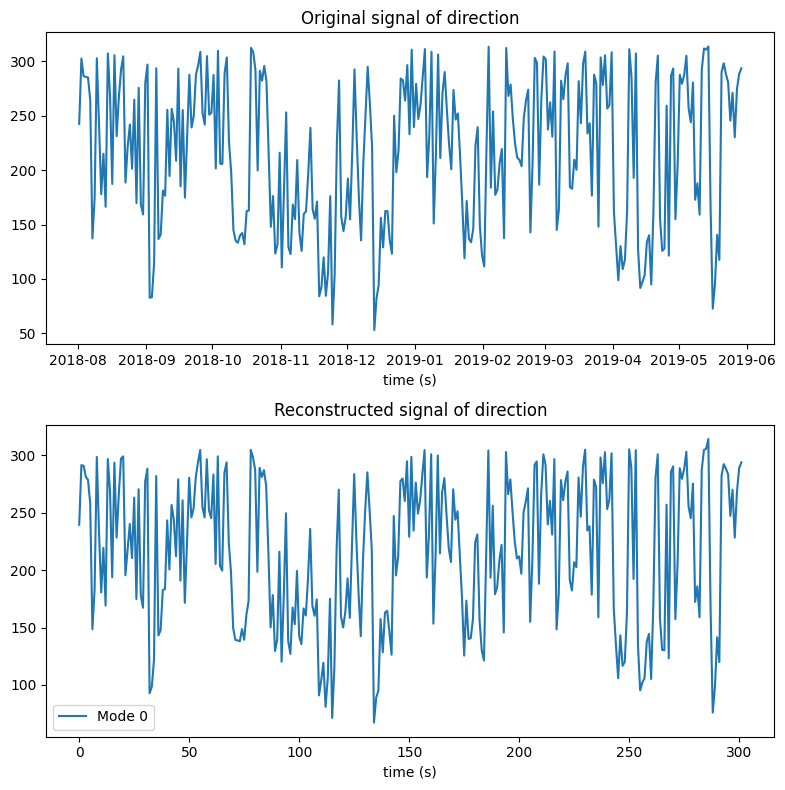

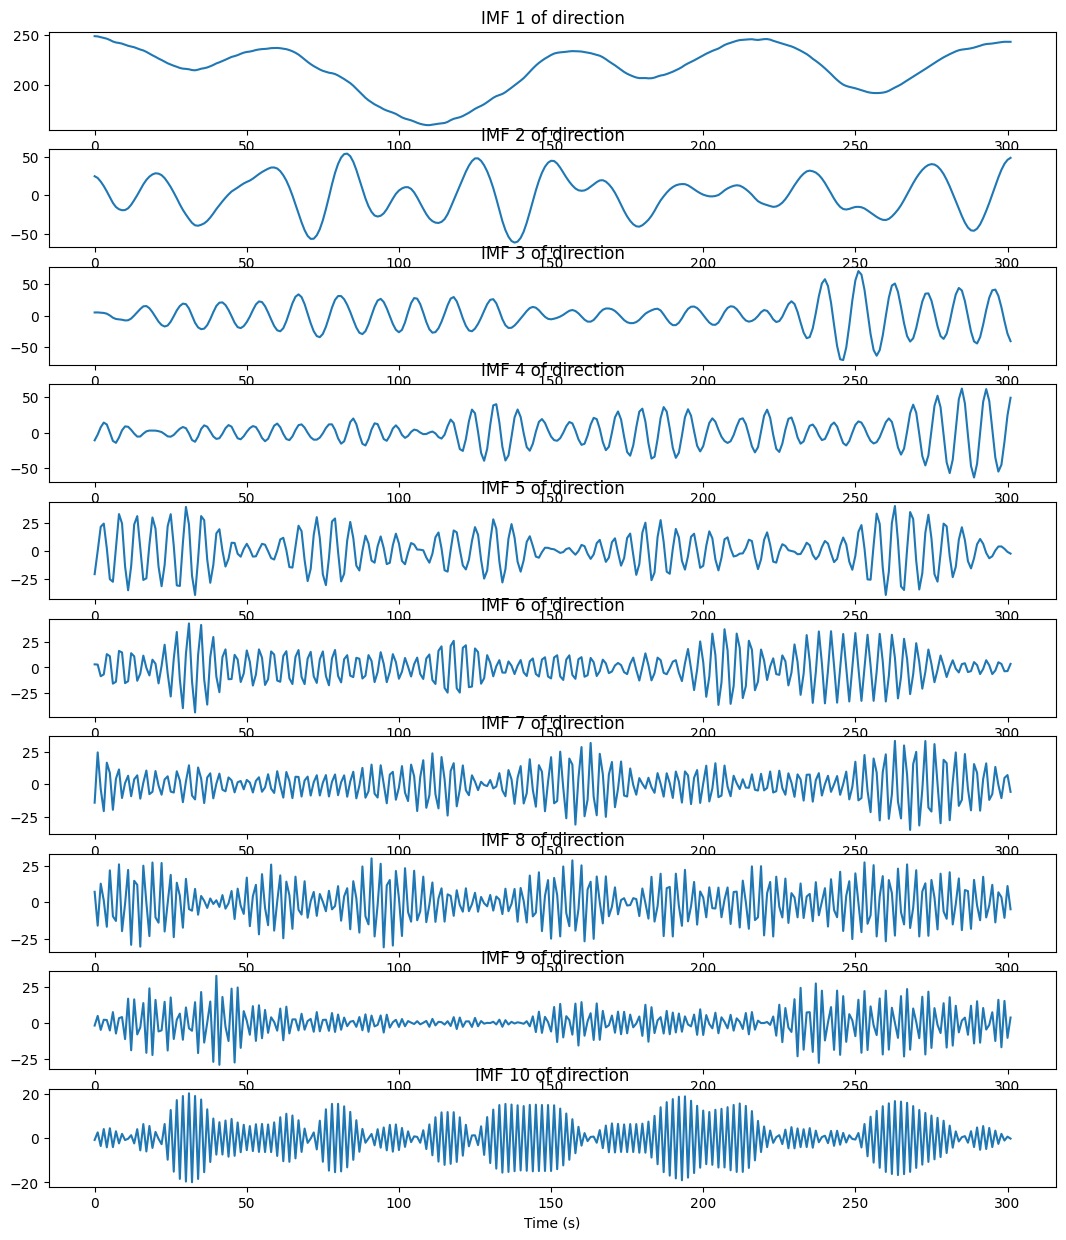

In [35]:
u,z,v = vmdpy.VMD(f, alpha, tau, 10, DC, init, tol)

imfsdata = pd.DataFrame(u)
datad = imfsdata.T
datad.index = df.index
datad["power"] = df["power"]

recon_sig = sum(u)
#. Visualize decomposed modes
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(f[:5000])
plt.title('Original signal of direction')
plt.xlabel('time (s)')
plt.subplot(2,1,2)
plt.plot(recon_sig[:5000])
plt.title('Reconstructed signal of direction')
plt.xlabel('time (s)')
plt.legend(['Mode %d'%m_i for m_i in range(u.shape[0])])
plt.tight_layout()

plt.figure(figsize=(13,15))
imfs=u
num_imfs = len(imfs)
for i in range(num_imfs):
    plt.subplot(num_imfs, 1, i + 1)
    plt.plot(u[i][:5000])
    plt.title('IMF {} of direction'.format(i + 1))
    plt.xlabel('Time (s)')
plt.show()

In [36]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
if len(f) > len(recon_sig):
    f = f[:len(recon_sig)]
else:
    recon_sig = recon_sig[:len(f)]
print('# RMSE GP : ' + str(rmse(recon_sig, f)))

# RMSE GP : 5.922394183917028


In [37]:
datad

,0,1,2,3,4,5,6,7,8,9,power
datetime,,,,,,,,,,,
2018-08-01 10:18:00,248.636094,24.737408,4.827717,-10.949255,-21.068951,3.048607,-14.229833,7.248956,-1.871359,-0.837431,0.204117
2018-08-02 10:20:00,248.391114,22.463929,4.889770,-2.819442,-0.311600,2.821719,24.805129,-16.066847,4.788724,2.563139,2.461195
2018-08-03 10:22:00,247.638191,17.830753,4.420317,7.554071,21.429551,-8.644887,-3.643985,12.856290,-4.845312,-3.597724,0.935600
2018-08-04 10:24:00,246.987968,12.004790,4.087144,14.166755,24.285528,-6.800990,-20.814322,1.262438,2.146741,4.070438,6.400550
2018-08-05 10:25:00,246.137451,5.145048,2.885529,11.474413,2.098362,13.096299,16.855281,-16.821531,1.936030,-4.191893,9.644317
...,...,...,...,...,...,...,...,...,...,...,...
2019-05-25 09:46:00,242.261422,23.280474,31.263887,-55.202321,3.716320,5.127004,-0.454365,6.916386,15.880884,-2.636427,5.077550
2019-05-26 09:45:00,242.728046,32.987465,13.092287,-45.495587,3.798355,3.451192,-10.740540,3.492233,-16.822437,1.904301,7.970117
2019-05-27 09:43:00,243.045460,40.738195,-8.865168,-13.051286,1.673575,-3.717097,4.974137,-10.682417,15.096783,-1.115748,9.420067


In [38]:
max_cols = max(len(df.columns) for df in [datas, datap, datat, datah, datad])
max_imfs = max_cols-1
max_imfs

10

In [39]:
!pip install  GPy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 79.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 44.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.12.0 which is incompatible.
nilearn 0.11.1 requires scikit-learn>=1.4.0, but you have scikit-learn 1.2.2 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
imbalanced-learn 0.13.0 requires sc

In [40]:
import GPy

In [42]:
def train_sparse_gp(train_x, train_y, kernel, num_inducing=100, max_iters_init=200, max_iters_optimize=2000):
    # Create the sparse GP model
    m_GP = GPy.models.SparseGPRegression(X=train_x, Y=train_y, kernel=kernel, num_inducing=num_inducing)

    # Initialize Gaussian noise
    m_GP.Gaussian_noise.variance = m_GP.Y.var() * 0.01

    # Fix and optimize
    m_GP.Gaussian_noise.variance.fix()
    m_GP.optimize(max_iters=max_iters_init, messages=True)
    m_GP.Gaussian_noise.variance.unfix()
    m_GP.optimize(max_iters=max_iters_optimize, messages=True)

    return m_GP

def rmse(predictions, targets):
    return np.sqrt((predictions - targets) ** 2)

def mean_absolute_error(actual, predicted):
    return abs(actual - predicted)

def mean_absolute_percentage_error(actual, predicted):
    return 100 * abs((actual - predicted) / actual)

def plot_gp_predictions(trained_model, test_x,test_y):
    # Get predictions and variances from the trained model
    Y_pred_GP, Y_var_GP = trained_model.predict(test_x)

    # Create x-axis values using torch.linspace
    # xaxis = torch.linspace(0, len(test_x)*5, len(test_x))
    xaxis = np.linspace(0, len(test_x)*30, len(test_x))

    # Plot the predicted values
    plt.figure(figsize=(8, 6))
    plt.plot(xaxis, test_y, '--', color='red', label='Original power imf')  # Using a dashed line
    plt.plot(xaxis, Y_pred_GP, '--', color='blue', label='Predicted power imf')  # Using a dashed line

    # Plot the uncertainty (confidence interval)
    lower_bound = Y_pred_GP - 1.96 * np.sqrt(Y_var_GP)  # 95% confidence interval
    upper_bound = Y_pred_GP + 1.96 * np.sqrt(Y_var_GP)
    plt.fill_between(xaxis.flatten(), lower_bound.flatten(), upper_bound.flatten(), color='cyan', alpha=0.2, label='95% Confidence Interval')

    plt.grid(True)  # Add grid lines
    plt.xlim(min(xaxis), max(xaxis))  # Set x-axis limits
    plt.ylim(min(Y_pred_GP - 2 * np.sqrt(Y_var_GP)), max(Y_pred_GP + 2 * np.sqrt(Y_var_GP)))  # Set y-axis limits
    plt.xlabel('Time in min', fontsize=14)  # Customize label font size
    plt.ylabel('Power imfs', fontsize=14)
    plt.title('GP Regression Predictions with Uncertainty', fontsize=16)
    plt.legend(['Original power imf','Predicted power imf', 'Confidence'])
    plt.show()

def process_data(train_start_date, point):
        data_train = []
        data_train_y = []
        for index in range(len(df)):
            if df.index[index].date() == train_start_date:
                break
        for i in range(index,index+60):
            val = [datas.iloc[i, point], datat.iloc[i, point], datah.iloc[i, point], datad.iloc[i, point]]
            data_train.append(val)
            data_train_y.append(datap.iloc[i,point])
    
        train_x = np.array(data_train)
        train_y = np.array(data_train_y).reshape((-1, 1))
        

        data_test = [datas.iloc[i+1, point], datat.iloc[i+1, point], datah.iloc[i+1, point], datad.iloc[i+1, point]]
        
        test_x = np.array(data_test).reshape(1, -1)
        test_y = np.array(datap.iloc[i+1, point]).reshape(-1, 1)
        return train_x, test_x, train_y, test_y, df.index[i+1]

In [ ]:
train_start_date = pd.to_datetime('2018-08-01').date()
df_predictions = pd.DataFrame()

for day in range(43):
    for i in range(max_imfs):
        point = i
        train_x, test_x, train_y, test_y, forecast_time = process_data(train_start_date, point)
        print(train_x.shape,train_y.shape,test_x.shape,test_y.shape,point,forecast_time)
    
        num_inducing = 100
        max_iters_init = 200
        max_iters_optimize = 5000
        kernel = GPy.kern.RBF(train_x.shape[1]) + GPy.kern.Bias(train_x.shape[1])
        trained_model= train_sparse_gp(train_x, train_y, kernel,num_inducing, max_iters_init, max_iters_optimize)
    
        Y_pred_GP = trained_model.predict(test_x)[0]
        print('# RMSE GP : ' + str(rmse(Y_pred_GP, test_y)))
        
        observed_pred = Y_pred_GP
        if i==0:
            imf_df = pd.DataFrame(observed_pred, columns=[0])
        else:
            imf_df[i] = observed_pred

    #print(imf_df)
    
    Y_pred_GP = np.sum(imf_df, axis=1)
    
    power_test = df.loc[forecast_time, 'power']

    df_day = pd.DataFrame({
        'forecast': Y_pred_GP.values, 
        'actual': [power_test]   
    }, index = [forecast_time])


    df_predictions = pd.concat([df_predictions, df_day])

    df_predictions.to_csv('wind_power_predictions.csv')
    
    rmse_value = rmse(power_test, Y_pred_GP)
    print("RMSE:", rmse_value)
    
    mae = mean_absolute_error(power_test, Y_pred_GP)
    print("MAE:", mae)
    
    r2 = r2_score([power_test], [Y_pred_GP])  
    print("r2_score:", r2)
    
    mape = mean_absolute_percentage_error(power_test, Y_pred_GP)
    print("MAPE:", mape)

    train_start_date += pd.Timedelta(days=1)

(60, 4) (60, 1) (1, 4) (1, 1) 0 2018-09-30 12:13:00


# RMSE GP : [[0.02601369]]
(60, 4) (60, 1) (1, 4) (1, 1) 1 2018-09-30 12:13:00


# RMSE GP : [[0.4389075]]
(60, 4) (60, 1) (1, 4) (1, 1) 2 2018-09-30 12:13:00


# RMSE GP : [[0.27300096]]
(60, 4) (60, 1) (1, 4) (1, 1) 3 2018-09-30 12:13:00


# RMSE GP : [[0.06241197]]
(60, 4) (60, 1) (1, 4) (1, 1) 4 2018-09-30 12:13:00


# RMSE GP : [[0.26348164]]
(60, 4) (60, 1) (1, 4) (1, 1) 5 2018-09-30 12:13:00


# RMSE GP : [[0.41709598]]
(60, 4) (60, 1) (1, 4) (1, 1) 6 2018-09-30 12:13:00


# RMSE GP : [[0.31801079]]
(60, 4) (60, 1) (1, 4) (1, 1) 7 2018-09-30 12:13:00


# RMSE GP : [[1.00547915]]
(60, 4) (60, 1) (1, 4) (1, 1) 8 2018-09-30 12:13:00


# RMSE GP : [[0.29216847]]
(60, 4) (60, 1) (1, 4) (1, 1) 9 2018-09-30 12:13:00


# RMSE GP : [[0.23813996]]
RMSE: 0    0.511594
dtype: float64
MAE: 0    0.511594
dtype: float64
r2_score: nan
MAPE: 0    8.108803
dtype: float64
(60, 4) (60, 1) (1, 4) (1, 1) 0 2018-10-01 12:15:00


 /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:R^2 score is not well-defined with less than two samples.


# RMSE GP : [[0.01657142]]
(60, 4) (60, 1) (1, 4) (1, 1) 1 2018-10-01 12:15:00


# RMSE GP : [[0.36318061]]
(60, 4) (60, 1) (1, 4) (1, 1) 2 2018-10-01 12:15:00


# RMSE GP : [[0.53640779]]
(60, 4) (60, 1) (1, 4) (1, 1) 3 2018-10-01 12:15:00


# RMSE GP : [[0.13147048]]
(60, 4) (60, 1) (1, 4) (1, 1) 4 2018-10-01 12:15:00


# RMSE GP : [[0.15268084]]
(60, 4) (60, 1) (1, 4) (1, 1) 5 2018-10-01 12:15:00


# RMSE GP : [[0.30186012]]
(60, 4) (60, 1) (1, 4) (1, 1) 6 2018-10-01 12:15:00


# RMSE GP : [[0.46426051]]
(60, 4) (60, 1) (1, 4) (1, 1) 7 2018-10-01 12:15:00


# RMSE GP : [[0.81505355]]
(60, 4) (60, 1) (1, 4) (1, 1) 8 2018-10-01 12:15:00


# RMSE GP : [[1.1581798]]
(60, 4) (60, 1) (1, 4) (1, 1) 9 2018-10-01 12:15:00
